('plot1_zeta_chain.png',
 'plot2_dna_fft_cloud.png',
 'plot3_prime_density_warp.png',
 'plot4_golden_torus_helix.png')

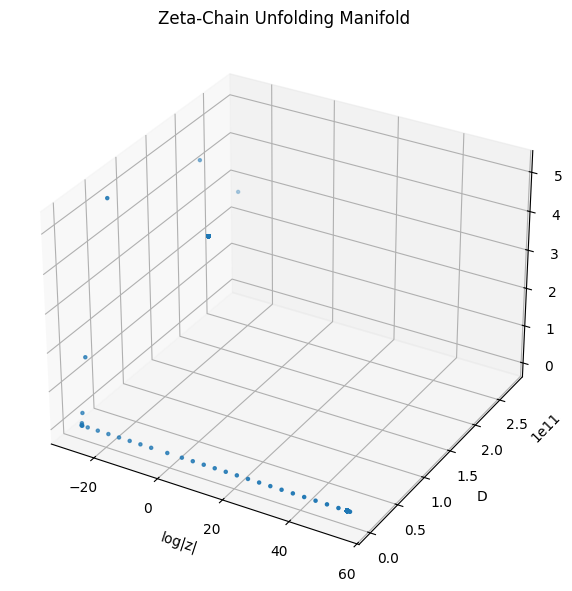

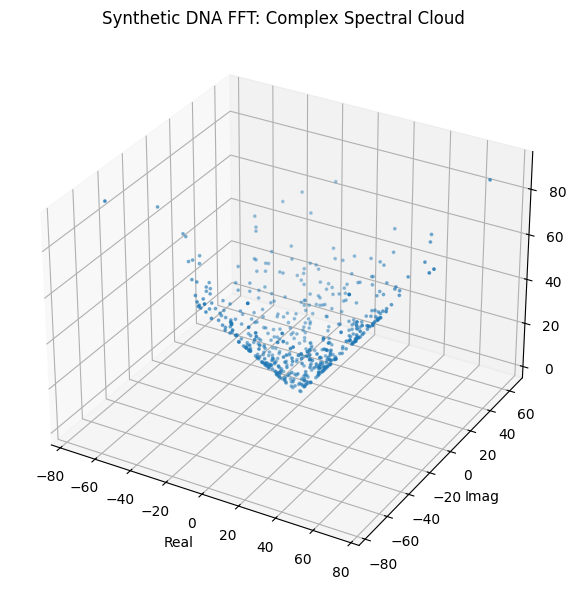

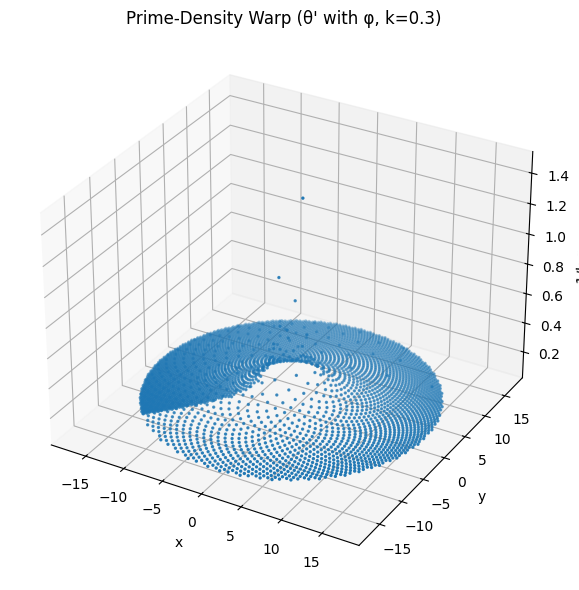

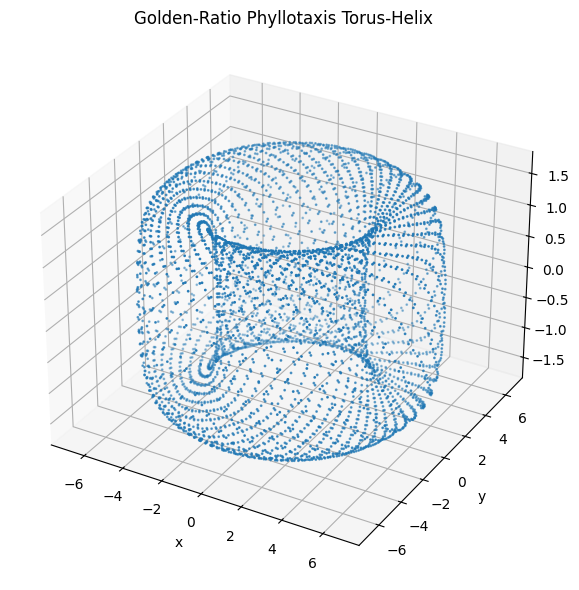

In [4]:
# Run with robustness guards against zero/underflow in the unfolding

import numpy as np # Import the numpy library for numerical operations
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 # Import the 3D plotting capabilities

# Define a function for the zeta-chain unfolding with robustness guards
def zeta_unfold_safe(a, b, c, k=0.3, steps=600, eps=1e-12):
    """
    Performs a safe zeta-chain unfolding process.

    Args:
        a, b, c (float): Initial values for the unfolding process.
        k (float): A constant parameter for the unfolding.
        steps (int): The number of unfolding steps to perform.
        eps (float): A small value to prevent zero or underflow.

    Returns:
        np.ndarray: An array of shape (steps, 3) containing the unfolded points (log|z|, D, E).
    """
    e = np.e # Get the value of Euler's number
    pts = [] # Initialize an empty list to store the unfolded points
    for _ in range(steps): # Loop through the specified number of steps
        # Apply robustness guards to prevent zero/underflow
        c = c if abs(c) > eps else np.sign(c) * eps if c != 0 else eps
        b = b if abs(b) > eps else np.sign(b) * eps if b != 0 else eps
        a = a if abs(a) > eps else np.sign(a) * eps if a != 0 else eps
        z = a * (b / c) # Calculate z
        D = c / a # Calculate D
        E = c / b # Calculate E
        ratio = (D / E) / e # Calculate the ratio
        F = k * (ratio ** k) # Calculate F
        pts.append((np.log(abs(z) + eps), D, E)) # Append the point (log|z|, D, E) to the list
        a, b, c = D, E, F if abs(F) > eps else eps # Update the values of a, b, and c for the next step
    return np.array(pts) # Convert the list of points to a numpy array

# Generate points for the zeta-chain unfolding
pts1 = zeta_unfold_safe(5.0, 0.3, np.e, steps=1200)

# Create a 3D plot for the Zeta-Chain Unfolding Manifold
fig1 = plt.figure(figsize=(7,6)) # Create a new figure
ax1 = fig1.add_subplot(111, projection='3d') # Add a 3D subplot
ax1.scatter(pts1[:,0], pts1[:,1], pts1[:,2], s=5) # Scatter plot the points
ax1.set_xlabel('log|z|') # Set the x-axis label
ax1.set_ylabel('D') # Set the y-axis label
ax1.set_zlabel('E') # Set the z-axis label
ax1.set_title('Zeta‑Chain Unfolding Manifold') # Set the title of the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
fig1.savefig('plot1_zeta_chain.png', dpi=160) # Save the figure

# Synthetic DNA FFT cloud
rng = np.random.default_rng(42) # Initialize a random number generator
N = 1024 # Define the number of bases
bases = rng.choice(list('ACGT'), size=N) # Generate a sequence of random DNA bases
map_c = {'A': 1+0j, 'C': 1j, 'G': -1+0j, 'T': -1j} # Define a mapping from bases to complex numbers
signal = np.array([map_c[b] for b in bases], dtype=np.complex128) # Convert the base sequence to a complex signal
X = np.fft.fft(signal) # Perform the Fast Fourier Transform (FFT) on the signal
re = X.real[:N//2] # Get the real part of the FFT results (up to Nyquist frequency)
im = X.imag[:N//2] # Get the imaginary part of the FFT results (up to Nyquist frequency)
mag = np.abs(X)[:N//2] # Get the magnitude of the FFT results (up to Nyquist frequency)

# Create a 3D plot for the Synthetic DNA FFT Complex Spectral Cloud
fig2 = plt.figure(figsize=(7,6)) # Create a new figure
ax2 = fig2.add_subplot(111, projection='3d') # Add a 3D subplot
ax2.scatter(re, im, mag, s=3) # Scatter plot the real, imaginary, and magnitude values
ax2.set_xlabel('Real') # Set the x-axis label
ax2.set_ylabel('Imag') # Set the y-axis label
ax2.set_zlabel('Magnitude') # Set the z-axis label
ax2.set_title('Synthetic DNA FFT: Complex Spectral Cloud') # Set the title of the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
fig2.savefig('plot2_dna_fft_cloud.png', dpi=160) # Save the figure

# Prime‑density warp
def prime_density_warp(N=4000, k=0.3):
    """
    Generates points for a prime-density warp visualization.

    Args:
        N (int): The number of points to generate.
        k (float): A constant parameter for the warp.

    Returns:
        tuple: A tuple containing three numpy arrays for the x, y, and z coordinates.
    """
    n = np.arange(2, N+2) # Create an array of numbers from 2 to N+1
    phi = (1 + np.sqrt(5)) / 2 # Calculate the golden ratio (phi)
    theta = phi * ((np.mod(n, phi)/phi)**k) # Calculate the theta values with the warp
    r = n ** (1/3) # Calculate the radial values
    x = r * np.cos(theta * 2*np.pi) # Calculate the x-coordinates
    y = r * np.sin(theta * 2*np.pi) # Calculate the y-coordinates
    z = 1 / np.log(n) # Calculate the z-coordinates (inverse of log of n)
    return x, y, z # Return the x, y, and z coordinates

# Generate points for the prime-density warp
x3, y3, z3 = prime_density_warp(5000, k=0.3)

# Create a 3D plot for the Prime-Density Warp
fig3 = plt.figure(figsize=(7,6)) # Create a new figure
ax3 = fig3.add_subplot(111, projection='3d') # Add a 3D subplot
ax3.scatter(x3, y3, z3, s=2) # Scatter plot the points
ax3.set_xlabel('x') # Set the x-axis label
ax3.set_ylabel('y') # Set the y-axis label
ax3.set_zlabel('1/log n') # Set the z-axis label
ax3.set_title('Prime‑Density Warp (θ\' with φ, k=0.3)') # Set the title of the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
fig3.savefig('plot3_prime_density_warp.png', dpi=160) # Save the figure

# Golden‑ratio phyllotaxis torus‑helix
phi = (1 + np.sqrt(5)) / 2 # Calculate the golden ratio (phi)
N = 5000 # Define the number of points
k_idx = np.arange(1, N+1) # Create an array of indices from 1 to N
golden_angle = 2 * np.pi * (1 - 1/phi) # Calculate the golden angle

R = 5.0 # Define the major radius of the torus
r = 1.75 # Define the minor radius of the torus
theta = k_idx * golden_angle # Calculate the theta values based on the golden angle
u = (k_idx / N) * 6*np.pi # Calculate the u values for the torus and helix

# Calculate the x, y, and z coordinates for the Golden-Ratio Phyllotaxis Torus-Helix
x4 = (R + r*np.cos(u)) * np.cos(theta)
y4 = (R + r*np.cos(u)) * np.sin(theta)
z4 = r * np.sin(u) + 0.6*np.sin(3*u)/3 + 0.3*np.sin(5*u)/5

# Create a 3D plot for the Golden-Ratio Phyllotaxis Torus-Helix
fig4 = plt.figure(figsize=(7,6)) # Create a new figure
ax4 = fig4.add_subplot(111, projection='3d') # Add a 3D subplot
ax4.scatter(x4, y4, z4, s=1) # Scatter plot the points
ax4.set_xlabel('x') # Set the x-axis label
ax4.set_ylabel('y') # Set the y-axis label
ax4.set_zlabel('z') # Set the z-axis label
ax4.set_title('Golden‑Ratio Phyllotaxis Torus‑Helix') # Set the title of the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
fig4.savefig('plot4_golden_torus_helix.png', dpi=160) # Save the figure

('plot1_zeta_chain.png',
 'plot2_dna_fft_cloud.png',
 'plot3_prime_density_warp.png',
 'plot4_golden_torus_helix.png')